## Ensemble Methods
### Agenda

<hr>
1. Introduction to Ensemble Methods
2. RandomForest
3. AdaBoost
4. GradientBoostingTree
5. VotingClassifier

<hr>

### 1. Introduction to Ensemble Method
* Objective of ensemble methods is to combine the predictions of serveral base estimators ( Linear Regression, Decisison Tree, etc. ) to create a combined effect or more genralized model.
* Two types of Ensemble Method
  - Averaging Method : Build several estimators independently & average their predictions. Examples are RandomForest etc.
  - Boosting Method : Base estimators are built sequentially using weighted version of data .i.e fitting models with data that were mis-classified. Examples are AdaBoost
  
<img src="https://cdn-images-1.medium.com/max/1000/1*PaXJ8HCYE9r2MgiZ32TQ2A.png">

### 2. RandomForest
* Recap - Limitations of decison tree is that it overfits & shows high variance.
* RandomForest is an averaging ensemble method whose prediction is function of prediction of 'n' decision trees.

<img src="https://www.researchgate.net/profile/Stavros_Dimitriadis/publication/324517994/figure/fig1/AS:615965951799303@1523869135381/Classification-process-based-on-the-Random-Forest-algorithm-2.png">

##### Algorithm
* Data consist of R rows & M features.
* Sample of training data is taken.
* Random set of features are selected.
* As many as configured number of trees are created using above two steps.
* Final prediction in case of classification is majority prediction.
* Final prediction in case of regression is mean/median of individual tree prediction

##### Comparing Decision Tree & Random Forest for MNIST data

In [4]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
digits = load_digits()

In [6]:
X = digits.data
y = digits.target

In [7]:
trainX, testX, trainY, testY = train_test_split(X,y)

In [8]:
dt = DecisionTreeClassifier()

In [9]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
dt.score(testX,testY)

0.8444444444444444

In [11]:
rf = RandomForestClassifier()

In [12]:
rf.fit(trainX,trainY)

C:\Users\awant\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
rf.score(testX,testY)

0.9422222222222222

##### Important Hyper-parameters
* n_estimators : number of trees to be configured, larger is better but compute cost.
* max_features : maximum number of features to be considered for splitting the node. For classification this equals to sqrt(n_features). And, for regression max_features = n_features.
* n_jobs : Configure as -1 so that we can make use of all cores.

#### Advantages
* Minimal data cleaning or dealing with missing values required.
* Works well with high dimensional datasets
* Minimizes variance even for low variance models
* RandomForest can tell importance of features. We can find important features & use them in model training

In [18]:
rf.feature_importances_

array([0.        , 0.00153452, 0.0344571 , 0.01067713, 0.01082384,
       0.0112286 , 0.01315547, 0.00079271, 0.        , 0.00636646,
       0.02929224, 0.00748655, 0.01034612, 0.02012342, 0.00530885,
       0.00044021, 0.        , 0.00869604, 0.0159474 , 0.02412374,
       0.01963923, 0.05220618, 0.00815159, 0.00014153, 0.        ,
       0.01481827, 0.03841265, 0.02457494, 0.0387679 , 0.01440344,
       0.04183173, 0.00012386, 0.        , 0.04833531, 0.02064672,
       0.01335855, 0.03460345, 0.02480548, 0.04399556, 0.        ,
       0.        , 0.013969  , 0.02832915, 0.04130284, 0.02356978,
       0.0158596 , 0.01057897, 0.        , 0.        , 0.00519296,
       0.01254092, 0.02459812, 0.01702702, 0.02288651, 0.0375919 ,
       0.00183362, 0.        , 0.00197704, 0.0181349 , 0.01630303,
       0.02424614, 0.01287656, 0.01998931, 0.00157587])

### 3. AdaBoost
* Boosting in general is about building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.
* AdaBoost was first boosting algorithm.
* AdaBoost can be used for both classification & regression

##### Algorithm
* Core concept of adaboost is to fit weak learners ( like decision tree ) sequantially on repeatedly modifying data.
* Initially, each data is assigned equal weights.
* A base estimator is fitted with this data.
* Weights of misclassified data are increased & weights of correctly classified data is decreased. 
* Repeat the above two steps till all data are correctly classified or max number of iterations configured.
* Making Prediction : The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),n_estimators=600)

In [44]:
ab.fit(trainX,trainY)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=600, random_state=None)

In [45]:
ab.score(testX,testY)

0.9822222222222222

In [48]:
ab = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=20),n_estimators=600)

In [49]:
ab.fit(trainX,trainY)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=600, random_state=None)

In [50]:
ab.score(testX,testY)

0.9644444444444444

### 4. GradientBoostingTree
* A machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.
* One of the very basic assumption of linear regression is that it's sum of residuals is 0.
* These residuals as mistakes committed by our predictor model. 
* Although, tree based models are not based on any of such assumptions, but if sum of residuals is not 0, then most probably there is some pattern in the residuals of our model which can be leveraged to make our model better. 
* So, the intuition behind gradient boosting algorithm is to leverage the pattern in residuals and strenghten a weak prediction model, until our residuals don't show any pattern.
* Algorithmically, we are minimizing our loss function, such that test loss reach it’s minima.

##### Problem : House Price Prediction using GradientBoostingTree

In [69]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
house_data = load_boston()

In [53]:
X = house_data.data
y = house_data.target

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
gbt = GradientBoostingRegressor()

In [56]:
gbt

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
trainX, testX, trainY, testY = train_test_split(X,y)

In [59]:
gbt.fit(trainX,trainY)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [67]:
test_score = np.zeros(100, dtype=np.float64)
for i, y_pred in enumerate(gbt.staged_predict(testX)):
    test_score[i] = gbt.loss_(testY, y_pred)

Text(0,0.5,'Least squares Loss')

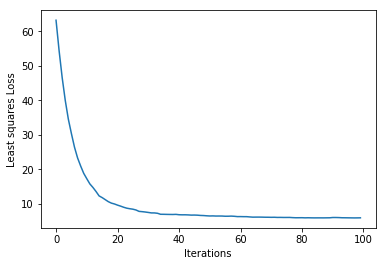

In [72]:
plt.plot(test_score)
plt.xlabel('Iterations')
plt.ylabel('Least squares Loss')

### 5. VotingClassifier
* Core concept of VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or weighted vote to predict the class labels. 
* Voting classifier is quite effective with good estimators & handles individual's limitations, ensemble methods can also participate. 
* Types of Voting Classifier
  - Soft Voting Classifier, different weights configured to different estimator
  - Hard Voting Classifier, all estimators have equal weighage

##### Problem : DIGIT identification using VotingClassifier

In [88]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [104]:
estimators = [ 
    ('rf',RandomForestClassifier(n_estimators=20)),
    ('svc',SVC(kernel='rbf', probability=True)),
    ('knc',KNeighborsClassifier()),
    ('abc',AdaBoostClassifier(base_estimator=DecisionTreeClassifier() ,n_estimators=20)),
    ('lr',LogisticRegression()) 
]

In [105]:
vc = VotingClassifier(estimators=estimators, voting='hard')

In [106]:
digits = load_digits()

In [107]:
X,y = digits.data, digits.target

In [108]:
trainX, testX, trainY, testY = train_test_split(X,y)

In [109]:
vc.fit(trainX,trainY)

C:\Users\awant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\awant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\awant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [110]:
vc.score(testX,testY)

0.9711111111111111

In [111]:
for est,name in zip(vc.estimators_,vc.estimators):
    print (name[0], est.score(testX,testY))
    

rf 0.9666666666666667
svc 0.4822222222222222
knc 0.9822222222222222
abc 0.8688888888888889
lr 0.9555555555555556


In [118]:
vc = VotingClassifier(estimators=estimators, voting='soft', weights=[2,.1,3,2,2])

In [119]:
vc.fit(trainX,trainY)

C:\Users\awant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\awant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\awant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[2, 0.1, 3, 2, 2])

In [120]:
vc.score(testX,testY)

0.9777777777777777